<a href="https://colab.research.google.com/github/Khushank-singh/ml-product-s-fake-review-detection-/blob/main/fake_review_of_product_detecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake Product Review Detection Project
This notebook contains the step-by-step process for detecting fake product reviews using machine learning.


In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khushanksingh","key":"f6b42fffd79dd5027b1da9c0f21cf9fb"}'}

installs the official Kaggle Python package

In [ ]:
!pip install kaggle


# Set up Kaggle API credentials by creating folder, copying kaggle.json, and setting secure permissions


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                      Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          20076        459  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          11749        200  1.0              
rohitgrewal/airlines-flights-data                                Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          22529        407  1.0          

In [ ]:
!kaggle datasets download -d mexwell/fake-reviews-dataset


Dataset URL: https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
fake-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("fake-reviews-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("fake_reviews_data")


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import pandas as pd
df = pd.read_csv('/content/fake reviews dataset.csv')
print(df.head())  # View the first few rows


             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


important lib

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , accuracy_score
from joblib import dump , load
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

//Preprocessing of data


In [ ]:
df = pd.read_csv('/content/fake reviews dataset.csv')
print("missing Values:\n" , df.isnull().sum())
df.dropna(inplace=True)

#text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove StopWords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words  = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

#Apply Preprocessing
df['cleaned_text'] = df['text_'].apply(preprocess_text)

#check class distribution
print("/nClass Distribution:\n" , df['label'].value_counts())



missing Values:
 category    0
rating      0
label       0
text_       0
dtype: int64
/nClass Distribution:
 label
CG    9109
OR    9102
Name: count, dtype: int64


//Split data o train and test

In [ ]:


# Load data
df = pd.read_csv('/content/fake reviews dataset.csv')

print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

# Text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)


df['cleaned_text'] = df['text_'].apply(preprocess_text)


print("\nColumns after preprocessing:", df.columns.tolist())


print("\nClass Distribution:\n", df['label'].value_counts())

Missing Values:
 category    0
rating      0
label       0
text_       0
dtype: int64

Columns after preprocessing: ['category', 'rating', 'label', 'text_', 'cleaned_text']

Class Distribution:
 label
CG    9109
OR    9102
Name: count, dtype: int64


In [ ]:

X = df['cleaned_text']
y = df['label']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Trainning samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")

Trainning samples:14568
Testing samples:3643


//Build and Train SVM Model

//Evaluate the model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
print(pipeline.named_steps['tfidf'])


TfidfVectorizer()


In [ ]:
print(hasattr(pipeline.named_steps['tfidf'], 'vocabulary_'))


True



Classification Report:
               precision    recall  f1-score   support

     Genuine       0.90      0.84      0.87      1841
        Fake       0.85      0.90      0.87      1802

    accuracy                           0.87      3643
   macro avg       0.87      0.87      0.87      3643
weighted avg       0.87      0.87      0.87      3643



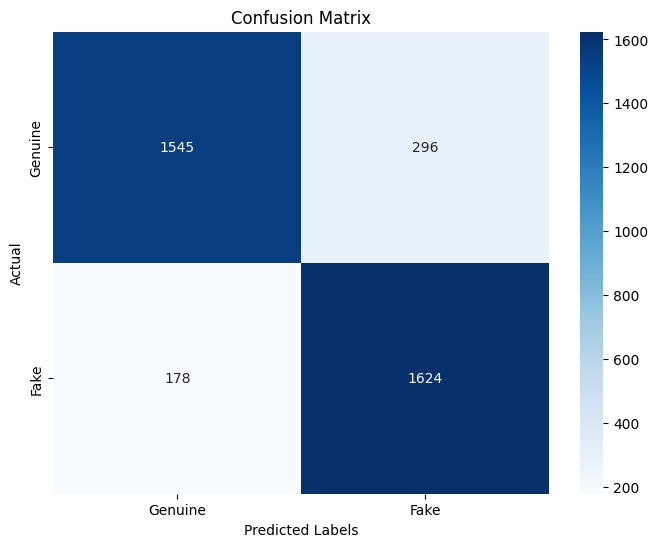


Model Accuracy: 86.99%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Genuine', 'Fake']))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine','Fake'],
            yticklabels=['Genuine','Fake'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



//Loading the Model Process


In [ ]:
from sklearn import svm
from joblib import dump, load
import numpy as np

# Dummy training data (replace with your actual data)
X_train = np.array([[0, 0], [1, 1]])
y_train = np.array([0, 1])

model = svm.SVC()
model.fit(X_train, y_train)

dump(model, 'svm_fake_review_detector.joblib')
print("Model saved as 'svm_fake_review_detector.joblib'")

loaded_model = load('svm_fake_review_detector.joblib')
print("Model loaded successfully!")




Model saved as 'svm_fake_review_detector.joblib'
Model loaded successfully!


//Final Checking The Model


// Make Predictions new Review.....

In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from joblib import dump, load

# Training phase (done earlier)
X_train = ["This is good", "Bad fake product"]
y_train = [1, 0]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

model = svm.SVC(probability=True)
model.fit(X_train_vec, y_train)

# Save model and vectorizer
dump(model, 'svm_fake_review_detector.joblib')
dump(vectorizer, 'review_vectorizer.joblib')

# ---------- Inference Phase ----------

# Load model and vectorizer
loaded_model = load('svm_fake_review_detector.joblib')
vectorizer = load('review_vectorizer.joblib')

def preprocess_text(text):
    return text.lower().strip()

def predict_review(text):
    cleaned_text = preprocess_text(text)
    text_vec = vectorizer.transform([cleaned_text])
    prediction = loaded_model.predict(text_vec)
    proba = loaded_model.predict_proba(text_vec)
    return {"prediction": prediction, "probability": proba}

# Now the dimensions will match!
sample_reviews = ["This Product is Awesome i like it "]
for review in sample_reviews:
    result = predict_review(review)
    print("\nResult:")
    for key, value in result.items():
        print(f"{key}: {value}")


Result:
prediction: [1]
probability: [[0.53357728 0.46642272]]
